# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc



In [3]:
# load data
df = pd.read_csv('data/df_eda2_cat.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187812 entries, 0 to 187811
Columns: 193 entries, state to "slug":"theater/spaces"
dtypes: float64(2), int64(190), object(1)
memory usage: 276.5+ MB


,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,successful,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,successful,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,failed,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,successful,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,successful,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# convert target column ('state') to numeric values
df['state'].replace({'failed':0, 'successful':1}, inplace=True)
df.head()

,state,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,1,6.907755,23,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.615805,51,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,9.479141,34,1439.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,7.937375,40,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,8.160518,31,720.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [5]:
# split features from target (features: X, target: y)
X = df.drop('state', axis=1)
y = df['state']
X.head()

,goal_usd_log,name_len,delta_dead_laun,AU,BE,CA,CH,DE,DK,ES,...,"""slug"":""technology/wearables""","""slug"":""technology/web""","""slug"":""theater""","""slug"":""theater/comedy""","""slug"":""theater/experimental""","""slug"":""theater/festivals""","""slug"":""theater/immersive""","""slug"":""theater/musical""","""slug"":""theater/plays""","""slug"":""theater/spaces"""
0,6.907755,23,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.615805,51,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.479141,34,1439.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.937375,40,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.160518,31,720.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (131468, 192)
y_train: (131468,)
X_test: (56344, 192)
y_test: (56344,)


## Logistic Regression Classifier

### simple logistic regression

In [ ]:
# create logistic regression classifier

# instantiate classifier
lr_clf = LogisticRegression(max_iter=1000)
# fit model to training data
lr_clf.fit(X_train, y_train)

# predict target values for train data
y_pred_train = lr_clf.predict(X_train)
# predict target values for test data
y_pred = lr_clf.predict(X_test)


In [ ]:

# Print classification reports for Logistic Regression

## train data
print('Classification report for TRAIN data: \n {}'.format(classification_report(y_train, y_pred_train)))
print("--------"*10)

## test data
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

In [ ]:
# Evaluate the model with a confusion matrix
## train data
cm = confusion_matrix(y_train, y_pred_train)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TRAIN data (NB clf):');

## test data
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');

## Hyperparameter Tuning

In [ ]:
param_lr = {'penalty':('l1','l2'), 
            'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['liblinear', 'lbfgs', 'sag', ]
               }

grid_lr = GridSearchCV(lr_clf, param_grid=param_lr, cv=5, scoring='f1', 
                           verbose=5, n_jobs=-1)

grid_lr.fit(X_train, y_train)

In [ ]:
## CURRENTLY FOR SCORE='F1'

# Show best parameters
print('Best score:\n{:.2f}'.format(grid_lr.best_score_))
print("Best parameters:\n{}".format(grid_lr.best_params_))

# Save best model as best_model
best_log_reg = grid_lr.best_estimator_
print(best_log_reg)

In [7]:
# load the pickled model from disk
import pickle

filename = 'logreg_model.sav'
best_log_reg = pickle.load(open(filename, 'rb'))
print(best_log_reg)

LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')


Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.72      0.63      0.67     22082
           1       0.78      0.84      0.81     34262

    accuracy                           0.76     56344
   macro avg       0.75      0.74      0.74     56344
weighted avg       0.76      0.76      0.76     56344

--------------------------------------------------------------------------------


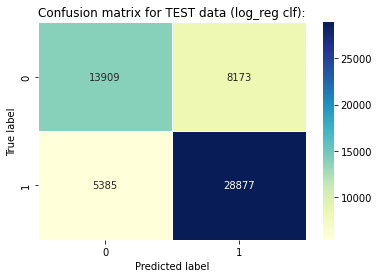

In [8]:
# evaluate test set
y_pred = best_log_reg.predict(X_test)

## classification report
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

## confusion matrix
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (log_reg clf):');

## ROC-AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.845


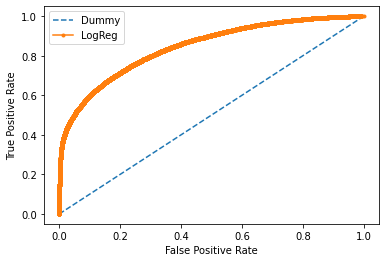

In [9]:
# fit best model to training data
best_log_reg.fit(X_train, y_train)

# predict probabilities
lr_probs = best_log_reg.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class) (does the same as the dummy classifier)
ns_probs = [1 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Dummy')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LogReg')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Precision-Recall Curve

Logistic Regression: f1=0.810 auc=0.903


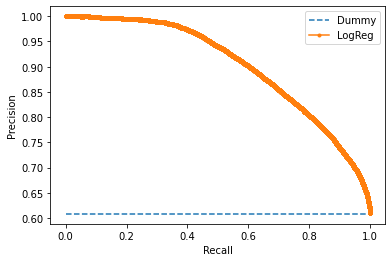

In [10]:
# precision-recall curve and f1

# predict class values
yhat = best_log_reg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)


# plot the precision-recall curve for the model
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Dummy')
plt.plot(lr_recall, lr_precision, marker='.', label='LogReg')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show();

In [ ]:
## save the model!

#import pickle

#filename = 'logreg_model.sav'
#pickle.dump(best_log_reg, open(filename, 'wb'))

## Error Analysis

In [15]:
# make new dataframe consisting of X_test, y_test, y_pred
# use X_test and y_test from before one-hot encoding!
df_non_cat = pd.read_csv('data/df_eda2.csv')
df_non_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187812 entries, 0 to 187811
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          187812 non-null  object 
 1   state            187812 non-null  object 
 2   goal_usd_log     187812 non-null  float64
 3   name_len         187812 non-null  int64  
 4   category         187812 non-null  object 
 5   delta_dead_laun  187812 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.6+ MB


In [16]:
# convert target column ('state') to numeric values
df_non_cat['state'].replace({'failed':0, 'successful':1}, inplace=True)
df_non_cat.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,1,6.907755,23,"""slug"":""games/playing cards""",720.0
1,US,1,9.615805,51,"""slug"":""music/rock""",720.0
2,GB,0,9.479141,34,"""slug"":""games/playing cards""",1439.0
3,US,1,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
4,US,1,8.160518,31,"""slug"":""music/classical music""",720.0


In [17]:

# split features from target (features: X, target: y)
X = df_non_cat.drop('state', axis=1)
y = df_non_cat['state']
X.head()


,country,goal_usd_log,name_len,category,delta_dead_laun
0,US,6.907755,23,"""slug"":""games/playing cards""",720.0
1,US,9.615805,51,"""slug"":""music/rock""",720.0
2,GB,9.479141,34,"""slug"":""games/playing cards""",1439.0
3,US,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
4,US,8.160518,31,"""slug"":""music/classical music""",720.0


In [18]:

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (131468, 5)
y_train: (131468,)
X_test: (56344, 5)
y_test: (56344,)


In [19]:
X_test.head()
X_test_reset = X_test.reset_index()

y_test_reset = y_test.reset_index()

In [20]:
# combine X_test, y_test and y_pred

y_pred_df = pd.DataFrame(y_pred)
y_pred_df['state_pred'] = y_pred_df.loc[:,0]
y_pred_df.drop(0, inplace=True, axis=1)
y_pred_df.info()
y_pred_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56344 entries, 0 to 56343
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   state_pred  56344 non-null  int64
dtypes: int64(1)
memory usage: 440.3 KB


,state_pred
0,1
1,1
2,0
3,1
4,1


In [21]:

df_error = pd.concat([X_test_reset, y_test_reset, y_pred_df], axis=1)
df_error.head()
#df_error.info()


,index,country,goal_usd_log,name_len,category,delta_dead_laun,index,state,state_pred
0,177305,US,8.704502,54,"""slug"":""film & video/animation""",360.0,177305,1,1
1,162338,US,8.517193,23,"""slug"":""music/rock""",720.0,162338,1,1
2,67273,US,6.214608,24,"""slug"":""crafts/woodworking""",1080.0,67273,1,0
3,34776,US,10.126631,37,"""slug"":""film & video/narrative film""",720.0,34776,1,1
4,71285,US,7.170120,52,"""slug"":""art/public art""",720.0,71285,1,1


### split into false negatives (state = 1 and state_pred = 0) and false positives (state = 0 and state_pred = 1)

In [25]:
# false positives
FP = df_error.query('state==0 and state_pred==1')
FP.info()
FP.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8173 entries, 10 to 56341
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            8173 non-null   int64  
 1   country          8173 non-null   object 
 2   goal_usd_log     8173 non-null   float64
 3   name_len         8173 non-null   int64  
 4   category         8173 non-null   object 
 5   delta_dead_laun  8173 non-null   float64
 6   index            8173 non-null   int64  
 7   state            8173 non-null   int64  
 8   state_pred       8173 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 638.5+ KB


,index,country,goal_usd_log,name_len,category,delta_dead_laun,index,state,state_pred
10,46777,US,9.210340,22,"""slug"":""film & video/narrative film""",721.0,46777,0,1
23,174980,GB,9.122466,60,"""slug"":""fashion/footwear""",696.0,174980,0,1
38,117400,US,7.313220,18,"""slug"":""crafts/crochet""",720.0,117400,0,1
41,169557,US,9.433484,60,"""slug"":""food/small batch""",720.0,169557,0,1
59,47250,US,9.210340,35,"""slug"":""art/public art""",1426.0,47250,0,1


In [26]:
# false negatives
FN = df_error.query('state==1 and state_pred==0')
FN.info()
FN.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 2 to 56328
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            5385 non-null   int64  
 1   country          5385 non-null   object 
 2   goal_usd_log     5385 non-null   float64
 3   name_len         5385 non-null   int64  
 4   category         5385 non-null   object 
 5   delta_dead_laun  5385 non-null   float64
 6   index            5385 non-null   int64  
 7   state            5385 non-null   int64  
 8   state_pred       5385 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 420.7+ KB


,index,country,goal_usd_log,name_len,category,delta_dead_laun,index,state,state_pred
2,67273,US,6.214608,24,"""slug"":""crafts/woodworking""",1080.0,67273,1,0
27,147963,US,8.006368,13,"""slug"":""journalism/photo""",1060.0,147963,1,0
33,150984,US,8.006368,16,"""slug"":""art/performance art""",863.0,150984,1,0
40,45404,US,8.987197,36,"""slug"":""design/architecture""",1080.0,45404,1,0
46,177464,GB,8.092846,25,"""slug"":""publishing/periodicals""",705.0,177464,1,0


<AxesSubplot:xlabel='category', ylabel='Count'>

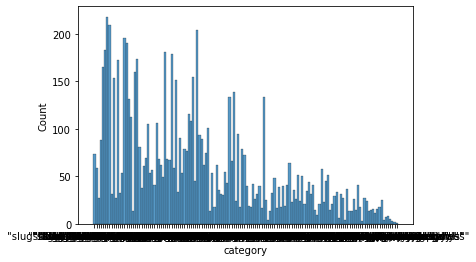

In [31]:
# plot category for false positives
sns.histplot(x='category', data=FP)

<AxesSubplot:xlabel='category', ylabel='Count'>

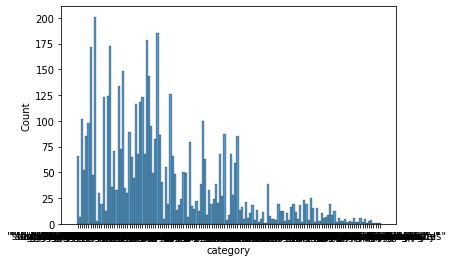

In [32]:
# plot category for false negatives
sns.histplot(x='category', data=FN)

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

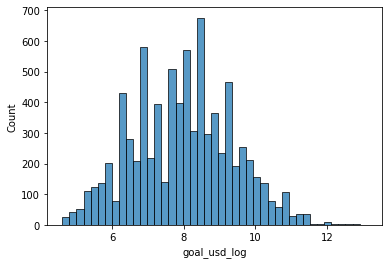

In [33]:
# plot goal ins usd for false positives
sns.histplot(x='goal_usd_log', data=FP)

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

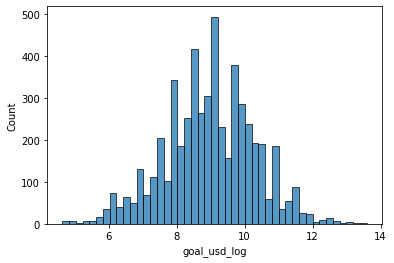

In [34]:
# plot goal ins usd for false negatives
sns.histplot(x='goal_usd_log', data=FN)

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

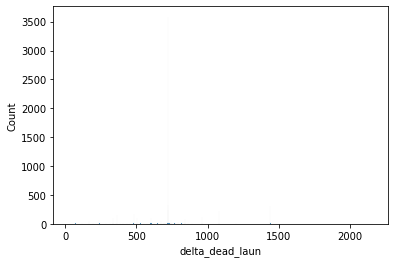

In [35]:
# plot time for false positives
sns.histplot(x='delta_dead_laun', data=FP)

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

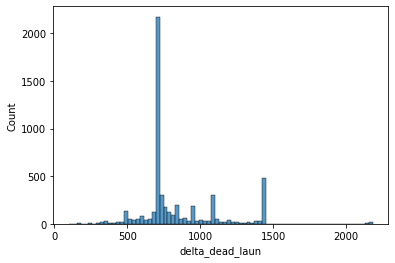

In [36]:
# plot time for false negatives
sns.histplot(x='delta_dead_laun', data=FN)

<AxesSubplot:xlabel='country', ylabel='Count'>

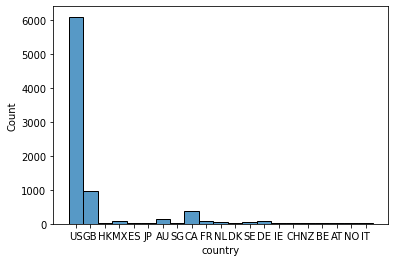

In [37]:
# plot country for false positives
sns.histplot(x='country', data=FP)

<AxesSubplot:xlabel='country', ylabel='Count'>

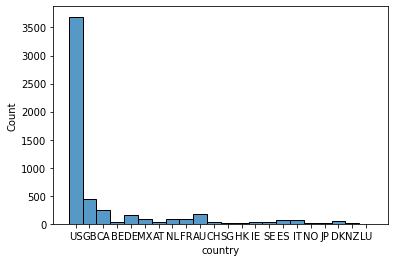

In [38]:
# plot country for false negatives
sns.histplot(x='country', data=FN)

<AxesSubplot:xlabel='name_len', ylabel='Count'>

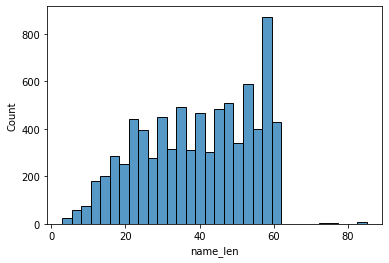

In [39]:
# plot name length for false positives
sns.histplot(x='name_len', data=FP)

<AxesSubplot:xlabel='name_len', ylabel='Count'>

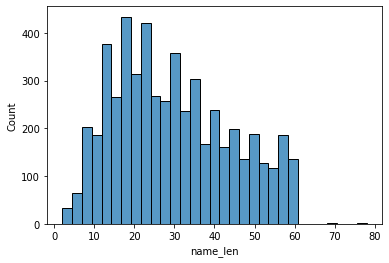

In [40]:
# plot name length for false negatives
sns.histplot(x='name_len', data=FN)

### Error analysis using yellowbrick

In [43]:
#from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
#visualizer = ClassPredictionError(
#    best_log_reg(random_state=42), classes=classes)

# Fit the training data to the visualizer
#visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
#visualizer.score(X_test, y_test)

# Draw visualization
#visualizer.show()

TypeError: 'LogisticRegression' object is not callable

## Feature Importance

Feature: 0, Score: -0.26150
Feature: 1, Score: 0.01913
Feature: 2, Score: -0.00061
Feature: 3, Score: -0.02163
Feature: 4, Score: -0.05189
Feature: 5, Score: 0.27278
Feature: 6, Score: 0.07448
Feature: 7, Score: -0.03859
Feature: 8, Score: 0.19655
Feature: 9, Score: -0.09967
Feature: 10, Score: 0.27879
Feature: 11, Score: 0.41521
Feature: 12, Score: 0.40170
Feature: 13, Score: 0.04343
Feature: 14, Score: -0.40697
Feature: 15, Score: 0.14241
Feature: 16, Score: 0.04571
Feature: 17, Score: -0.02473
Feature: 18, Score: -0.07161
Feature: 19, Score: 0.05649
Feature: 20, Score: 0.07681
Feature: 21, Score: 0.17859
Feature: 22, Score: 0.09607
Feature: 23, Score: 0.45434
Feature: 24, Score: -0.08409
Feature: 25, Score: -0.54958
Feature: 26, Score: -0.75590
Feature: 27, Score: 1.48291
Feature: 28, Score: -0.02673
Feature: 29, Score: -0.54454
Feature: 30, Score: -0.35286
Feature: 31, Score: -0.42897
Feature: 32, Score: 0.33204
Feature: 33, Score: -0.54788
Feature: 34, Score: -0.24807
Feature: 35,

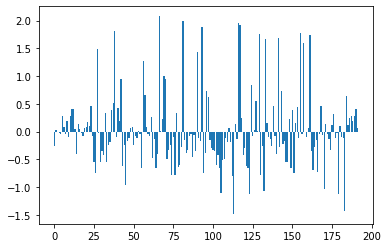

In [49]:
importance = best_log_reg.coef_[0]
for i,v in enumerate(importance):
   print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()